In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# First get list of column names and types for each table in the database
# Measurement table

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Then get list of column names and types for station table in database

inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c["name"], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Most recent date in the measurement table

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [12]:
#session.query(Measurement.date).order_by(Measurement.date).first()

In [13]:
# Last 12 months
# import datetime as dt

twelve_months_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(twelve_months_ago)

2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(most_recent_date)

# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(twelve_months_ago)


2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
prcptn_scores = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > twelve_months_ago).order_by(Measurement.date).all()

prcptn_scores

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcptn_scoresdf = pd.DataFrame(prcptn_scores, columns = ["date", "prcp"])
prcptn_scoresdf.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [17]:
# Sort the dataframe by date
#prcp_scores = prcptn_scoresdf.rename(columns = {"date" : "Date", "prcp": "Precipitation Score"})
prcp_scores = prcptn_scoresdf.rename(columns = {"date" : "Date", "prcp": "Precipitation Score"}).set_index('Date')
prcp_scores = prcp_scores.sort_index()
prcp_scores.head()

,Precipitation Score
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


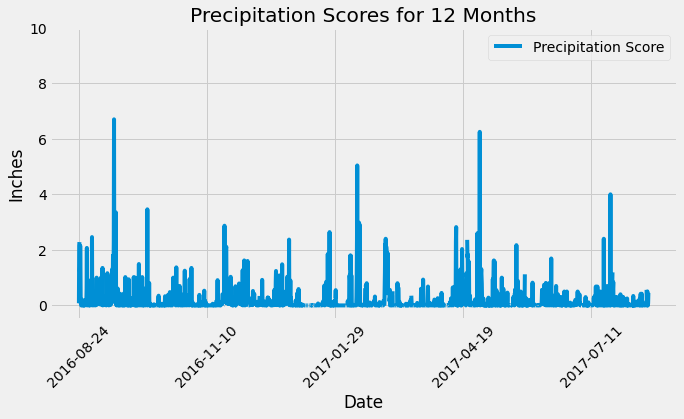

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores.plot(figsize=(10,5), ylim=(-0.5,10))
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tick_params(labelbottom=True)
plt.xticks(rotation=45)
plt.title(label = "Precipitation Scores for 12 Months")
plt.savefig("Images/Precipitation Scores.png")
plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores["Precipitation Score"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation Score, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station).count()
print("Total number of stations is : {}".format(station_total))

Total number of stations is : 9


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

low_hi_avg = (session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs),)\
            .filter(Measurement.station == most_active_stations[0][0]).all())
low_hi_avg

print(f"The lowest temperature is:{low_hi_avg[0][0]}F.")
print(f"The highest temperature is:{low_hi_avg[0][1]}F.")
print(f"The average temperature is:{round(low_hi_avg[0][2],2)}F.")


The lowest temperature is:54.0F.
The highest temperature is:85.0F.
The average temperature is:71.66F.


In [24]:
# Using the most active station id

most_active_stationid = session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_stationid


('USC00519281', 2772)

In [38]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = (session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date > twelve_months_ago).filter(Measurement.station == "USC00519281").order_by(Measurement.date).all())
temp

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [40]:
temp_df = pd.DataFrame(temp, columns = ["date", "tobs"])
#temp_df.head()
temp_df = temp_df.rename(columns = {"date" : "Date", "tobs": "Temperature"}).set_index('Date')
temp_df = temp_df.sort_index()
temp_df.head()


,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


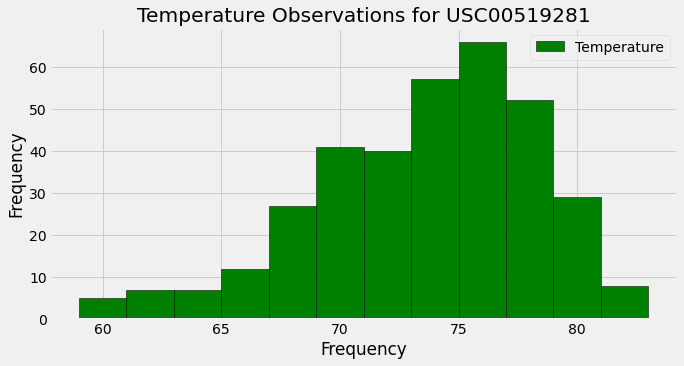

In [58]:
#Histogram

temp_df.plot(kind = "hist", bins = 12, figsize=(10,5), edgecolor="black", color="green")

#plt.figure();

plt.xlabel("Temperature")
plt.xlabel("Frequency")
plt.title(label = "Temperature Observations for USC00519281")
plt.savefig("Images/Station Temperature Histogram.png")
plt.show()

# Close session

In [59]:
# Close Session
session.close()